<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/47_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

tree.score(X_test, y_test)
tree.score(X_train, y_train)

0.9882629107981221

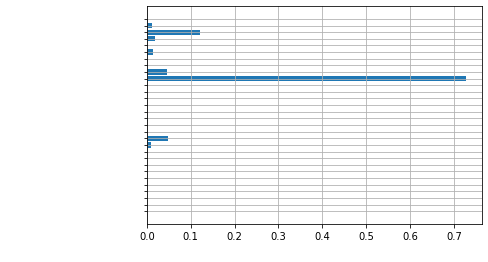

In [ ]:
tree.feature_importances_.shape[0] == cancer.data.shape[1]

def plt_feature_importances_cancer(model):

  plt.barh(range(cancer.data.shape[1]), model.feature_importances_, align='center')

  plt.yticks(np.arange(cancer.data.shape[1]), cancer.feature_names, c='white')

  plt.xlabel('feature importance', c='white')

  plt.ylabel('feature', c='white')

  plt.grid()

plt_feature_importances_cancer(tree)


Feature importances: [0. 1.]


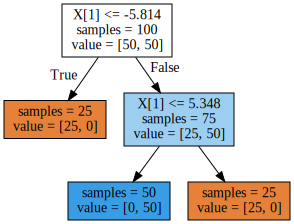

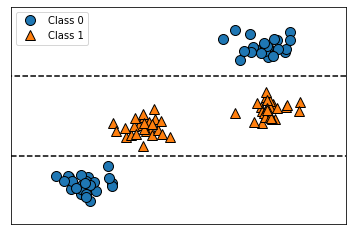

In [ ]:
import mglearn

tree_ = mglearn.plots.plot_tree_not_monotone()

display(tree_)

Text(0, 0.5, 'Price in $/Mbyte-Precio')

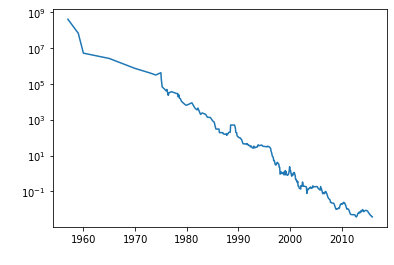

In [ ]:
url = r'https://raw.githubusercontent.com/amueller/introduction_to_ml_with_python/master/data/ram_price.csv'

ram = pd.read_csv(url)

plt.semilogy(ram.date, ram.price)
plt.xlabel('Year-Tiempo', c='white')
plt.ylabel('Price in $/Mbyte-Precio', c='white')

In [ ]:
data_train = ram[ram.date < 2000]
data_test = ram[ram.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_linr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_linr = np.exp(pred_linr)

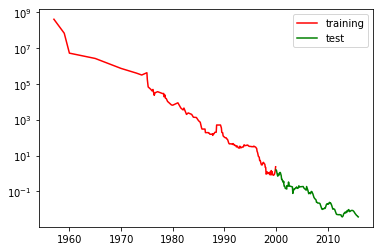

In [ ]:
plt.semilogy(data_train.date, data_train.price, label='training', c='r')
plt.semilogy(data_test.date, data_test.price, label='test', c='g')
plt.legend(loc=1)

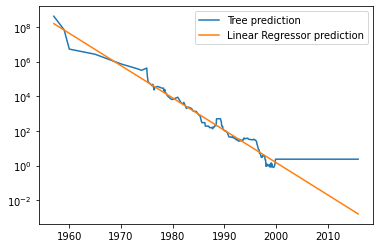

In [ ]:
plt.semilogy(ram.date, price_tree, label='Tree prediction')
plt.semilogy(ram.date, price_linr, label='Linear Regressor prediction')
plt.legend(loc=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

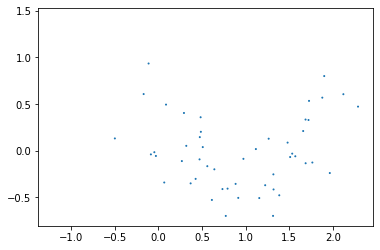

In [ ]:
X, y = make_moons(n_samples=100, noise=.25, random_state=3)

plt.scatter(X[:,0], X[:,1], y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# n_estimators --> numero de arboles
forest = RandomForestClassifier(n_estimators=100, random_state=2, max_depth=2).fit(X_train, y_train)

forest.estimators_[0] # --> aca estan guardados los arboles los 100 de random_forest cada uno con un error diferente



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1872583848, splitter='best')

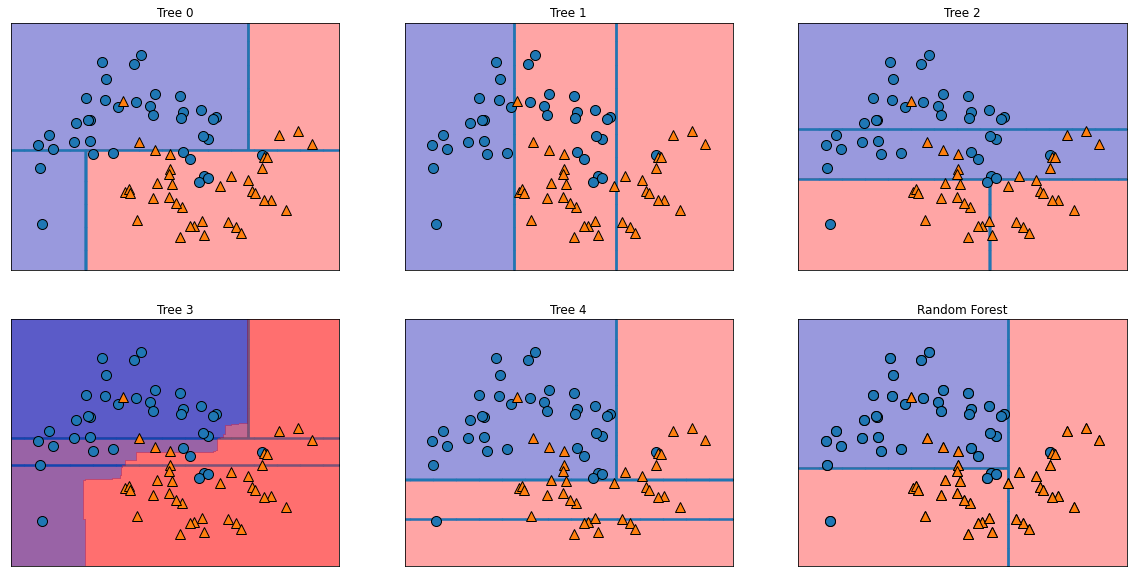

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):

  ax.set_title('Tree {}'.format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[1,0], alpha=.4)

axes[-1,-1].set_title('Random Forest')

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)


In [ ]:
# apply to dataset breast cancer

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

_Xtrain, _Xtest, _ytrain, _ytest = train_test_split(cancer.data, cancer.target, random_state=1)

_forest = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2).fit(_Xtrain, _ytrain)

print('Accuracy training {}'.format(_forest.score(_Xtrain, _ytrain)))
print('accuracy test {}'.format(_forest.score(_Xtest, _ytest)))


Accuracy training 0.9694835680751174
accuracy test 0.9370629370629371


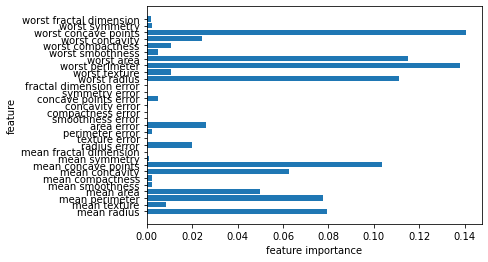

In [ ]:
def plot_feature_importances_cancer(model):

  n_features = cancer.data.shape[1]

  plt.barh(range(n_features), model.feature_importances_, align='center')

  plt.yticks(np.arange(n_features), cancer.feature_names)

  plt.xlabel('feature importance')

  plt.ylabel('feature')

plot_feature_importances_cancer(_forest)

AttributeError: ignored

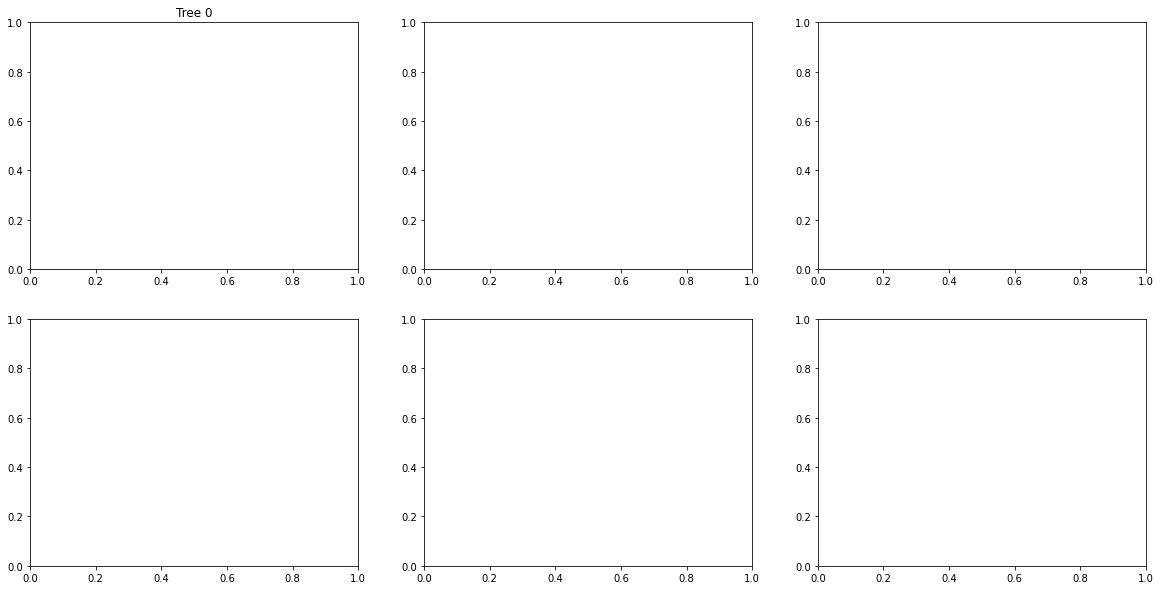

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


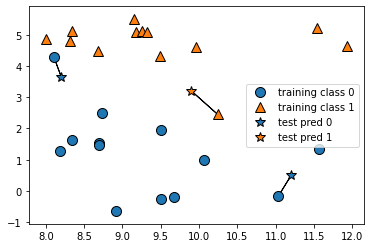